In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

# ENUMDATA = ["Access_to_Resources","Parental_Involvement","Motivation_Level","Teacher_Quality","Family_Income","Extracurricular_Activities","Internet_Access","Learning_Disabilities","Peer_Influence","Parental_Education_Level","Gender","Distance_from_Home","School_Type"]
data = pd.read_csv("StudentPerformanceFactors.csv")

LOWMEDHIGH = {"Low":1,"Medium":2,"High":3}
for i in ["Access_to_Resources","Parental_Involvement","Motivation_Level","Teacher_Quality","Family_Income"]:
    data[i] = data[i].map(LOWMEDHIGH)

NOYES = {"No":0,"Yes":1}
for i in ["Extracurricular_Activities","Internet_Access","Learning_Disabilities"]:
    data[i] = data[i].map(NOYES)

PEERMAP = {"Positive":1,"Negative":-1,"Neutral":0}
data["Peer_Influence"] = data["Peer_Influence"].map(PEERMAP)

EDULVLMAP = {"College":2,"Postgraduate":3,"High School":1, float('nan'):0}
data["Parental_Education_Level"] = data["Parental_Education_Level"].map(EDULVLMAP)

# GENDERMAP = {"Male":0,"Female":1}
# data["Gender"] = data["Gender"].map(GENDERMAP)

NEARMODFAR = {"Near":3,"Moderate":2,"Far":1}
data["Distance_from_Home"] = data["Distance_from_Home"].map(NEARMODFAR)

SCHOOLTYPEMAP = {"Public":0,"Private":1}
data["School_Type"] = data["School_Type"].map(SCHOOLTYPEMAP)

In [25]:
# First 5 rows of data
data.head(20)
men_data = data[data["Gender"] == "Male"].copy()
men_data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,3,0,7,73,1,1,0,1,2.0,0,1,3,0,1,3.0,Male,67
2,24,98,2,2,1,7,91,2,1,2,2,2.0,0,0,4,0,3,3.0,Male,74
3,29,89,1,2,1,8,98,2,1,1,2,2.0,0,-1,4,0,1,2.0,Male,71
5,19,88,2,2,1,8,89,2,1,3,2,2.0,0,1,3,0,3,3.0,Male,71
6,29,84,2,1,1,7,68,1,1,1,1,2.0,1,0,2,0,1,2.0,Male,67


In [26]:
# Basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6607 non-null   int64  
 1   Attendance                  6607 non-null   int64  
 2   Parental_Involvement        6607 non-null   int64  
 3   Access_to_Resources         6607 non-null   int64  
 4   Extracurricular_Activities  6607 non-null   int64  
 5   Sleep_Hours                 6607 non-null   int64  
 6   Previous_Scores             6607 non-null   int64  
 7   Motivation_Level            6607 non-null   int64  
 8   Internet_Access             6607 non-null   int64  
 9   Tutoring_Sessions           6607 non-null   int64  
 10  Family_Income               6607 non-null   int64  
 11  Teacher_Quality             6529 non-null   float64
 12  School_Type                 6607 non-null   int64  
 13  Peer_Influence              6607 

In [27]:
# Statistical Summary
data.describe()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score
count,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6529.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6540.000000,6607.000000
mean,19.975329,79.977448,2.086423,2.100197,0.596035,7.02906,75.070531,1.906463,0.924474,1.493719,1.787649,2.197580,0.304071,0.190858,2.967610,0.105191,1.682458,2.493272,67.235659
std,5.990594,11.547475,0.695521,0.698347,0.490728,1.46812,14.399784,0.695798,0.264258,1.230570,0.742617,0.599878,0.460048,0.755876,1.031231,0.306823,0.799428,0.671749,3.890456
min,1.000000,60.000000,1.000000,1.000000,0.000000,4.00000,50.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,55.000000
25%,16.000000,70.000000,2.000000,2.000000,0.000000,6.00000,63.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,2.000000,2.000000,1.000000,7.00000,75.000000,2.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,3.000000,0.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,3.000000,3.000000,1.000000,8.00000,88.000000,2.000000,1.000000,2.000000,2.000000,3.000000,1.000000,1.000000,4.000000,0.000000,2.000000,3.000000,69.000000
max,44.000000,100.000000,3.000000,3.000000,1.000000,10.00000,100.000000,3.000000,1.000000,8.000000,3.000000,3.000000,1.000000,1.000000,6.000000,1.000000,3.000000,3.000000,101.000000


In [28]:
# Find the index of the maximum hours studied
max_hours_index = data['Hours_Studied'].idxmax()

# Retrieve and print the row with the maximum hours studied
max_hours_data = data.loc[max_hours_index]
print(max_hours_data)

Hours_Studied                     44
Attendance                        68
Parental_Involvement               3
Access_to_Resources                1
Extracurricular_Activities         0
Sleep_Hours                        9
Previous_Scores                   75
Motivation_Level                   1
Internet_Access                    1
Tutoring_Sessions                  3
Family_Income                      2
Teacher_Quality                  3.0
School_Type                        1
Peer_Influence                    -1
Physical_Activity                  2
Learning_Disabilities              0
Parental_Education_Level           1
Distance_from_Home               2.0
Gender                        Female
Exam_Score                        71
Name: 2895, dtype: object


In [29]:
# Missing values
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level       0
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

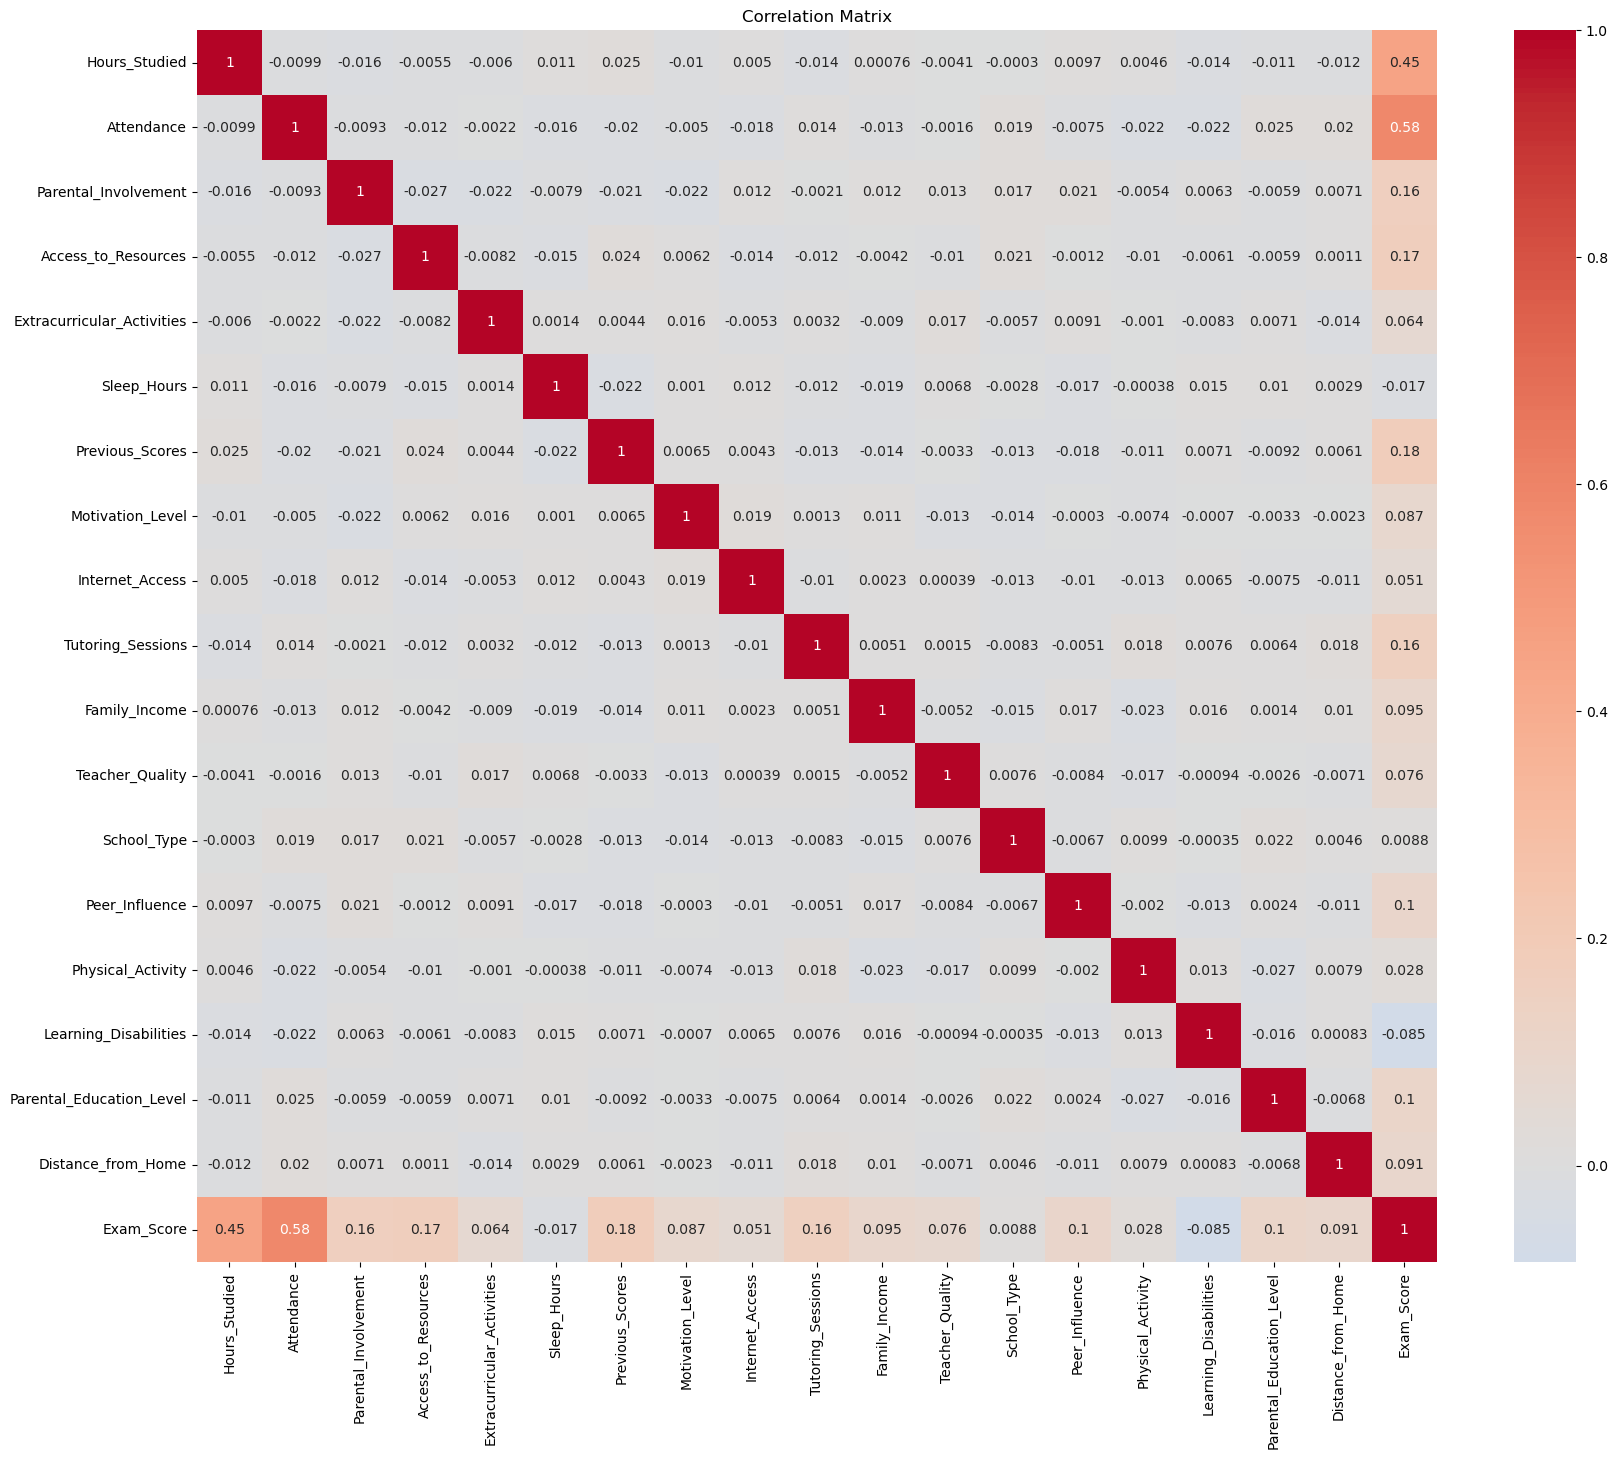

In [30]:
# Correlation Matrix ( Numeric Only )
corr_matrix = data.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=np.array((10, 8)) * 2)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [31]:
(correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False).head(10))

NameError: name 'correlation_matrix' is not defined

In [30]:
(correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False).tail(10))

Parental_Involvement   Previous_Scores              -0.021074
Sleep_Hours            Previous_Scores              -0.021750
Parental_Involvement   Extracurricular_Activities   -0.021881
Attendance             Learning_Disabilities        -0.022231
Parental_Involvement   Motivation_Level             -0.022393
Attendance             Physical_Activity            -0.022435
Family_Income          Physical_Activity            -0.022820
Parental_Involvement   Access_to_Resources          -0.026557
Physical_Activity      Parental_Education_Level     -0.026800
Learning_Disabilities  Exam_Score                   -0.085066
dtype: float64

In [10]:
# Compute the correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Extract the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Unstack the matrix to convert it into a series and drop NaN values
sorted_pairs = upper_triangle.unstack().dropna().sort_values(ascending=False).head(15)

# Adjust display options to avoid truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the sorted pairs
print(sorted_pairs)

Exam_Score  Attendance                    0.581072
            Hours_Studied                 0.445455
            Previous_Scores               0.175079
            Access_to_Resources           0.169770
            Parental_Involvement          0.157114
            Tutoring_Sessions             0.156525
            Parental_Education_Level      0.101940
            Peer_Influence                0.100217
            Family_Income                 0.094555
            Distance_from_Home            0.091110
            Motivation_Level              0.086937
            Teacher_Quality               0.076387
            Extracurricular_Activities    0.064382
            Internet_Access               0.051475
            Physical_Activity             0.027824
dtype: float64


In [14]:
# x_key -> data for x axis, y_key -> data for y axis, c_key data for color
# Set color stuff i change change lng and map values kay ugly

def color_data(c_key):
    color_map = {3:'green',2:'yellow',1:'blue',0:'red',float('nan'):'black'}
    colors = None   # No color mapping in case invalid ang c_key
    if c_key in data.keys():
        if c_key in ENUMDATA:
            colors = data[c_key].map(color_map) # if data is enum get colors from map
        else:
            colors = c_key                      # if data already numerical get colors from gradient
    return colors

In [15]:
# Visualization Scatter Plot with Regresion
y_key = "Exam_Score"
c_key = "Gender"
x_key = "Hours_Studied"

#Draw Scatter Plot
data.plot(kind="scatter",x=x_key,y=y_key,c=color_data(c_key))

#Get Slope and Intercept
slope, intercept = np.polyfit(data[x_key], data[y_key], 1) 
print(f"Slope: {slope}       Intercept: {intercept}")

#Draw Regression
plt.plot(data[x_key], slope * data[x_key] + intercept, color = 'red')

NameError: name 'ENUMDATA' is not defined

Slope: 0.0007960504026209089       Intercept: 2.9517087416397962


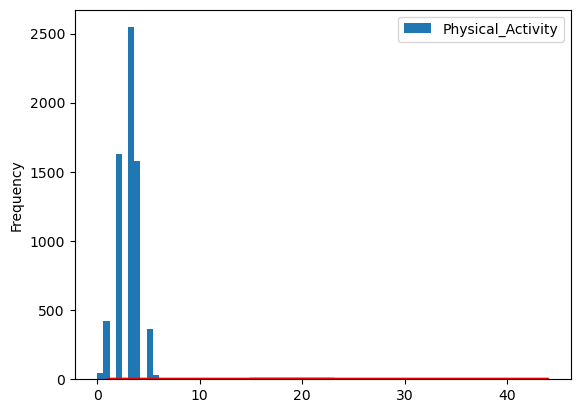

In [61]:
# Visualization Scatter Plot with Regresion
y_key = "Physical_Activity"
c_key = "Attendance"
x_key = "Hours_Studied"


#Draw Scatter Plot
data.plot(kind="hist",x=x_key,y=y_key)

#Get Slope and Intercept
slope, intercept = np.polyfit(data[x_key], data[y_key], 1) 
print(f"Slope: {slope}       Intercept: {intercept}")

#Draw Regression
plt.plot(data[x_key], slope * data[x_key] + intercept, color = 'red')

Slope: -0.0018682715767054786       Intercept: 2.1237428300105177


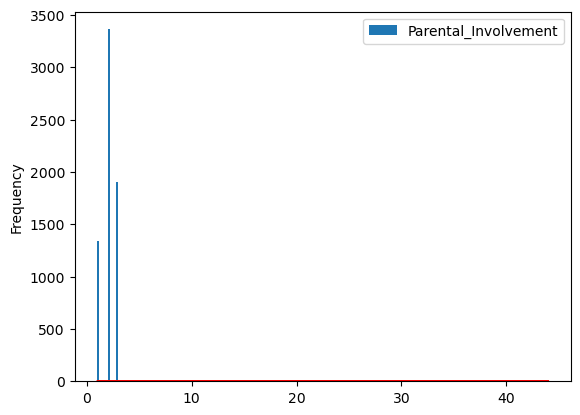

In [65]:

# Visualization Scatter Plot with Regresion
y_key = "Parental_Involvement"
c_key = "Attendance"
x_key = "Hours_Studied"


#Draw Scatter Plot
data.plot(kind="hist",x=x_key,y=y_key)

#Get Slope and Intercept
slope, intercept = np.polyfit(data[x_key], data[y_key], 1) 
print(f"Slope: {slope}       Intercept: {intercept}")

#Draw Regression
plt.plot(data[x_key], slope * data[x_key] + intercept, color = 'red')

<Figure size 800x600 with 0 Axes>

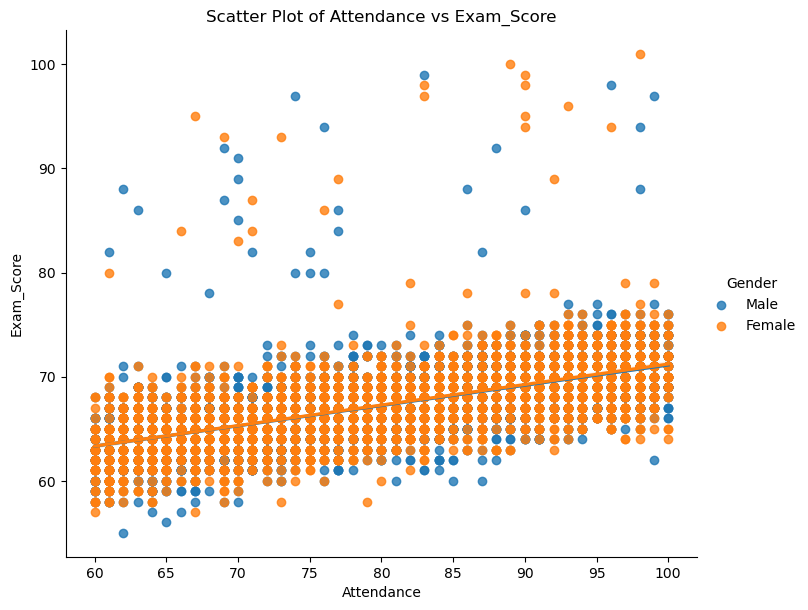

<Figure size 800x600 with 0 Axes>

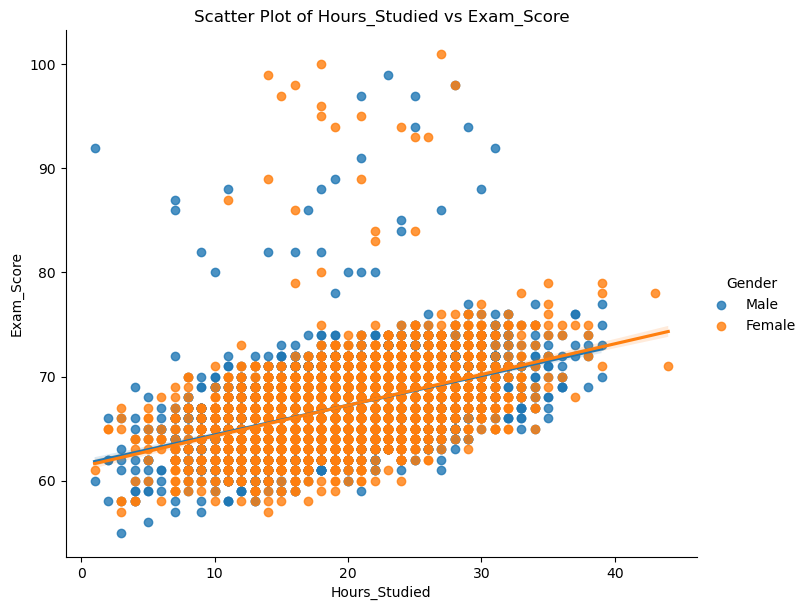

<Figure size 800x600 with 0 Axes>

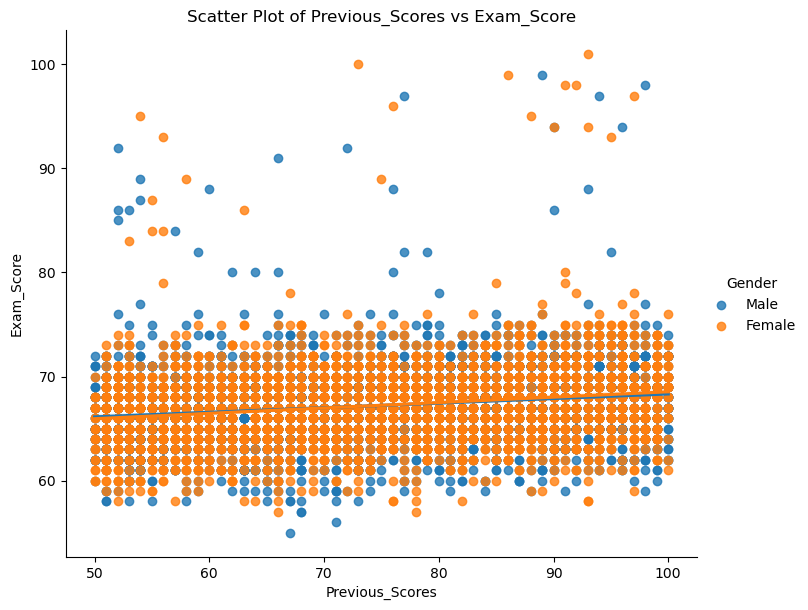

<Figure size 800x600 with 0 Axes>

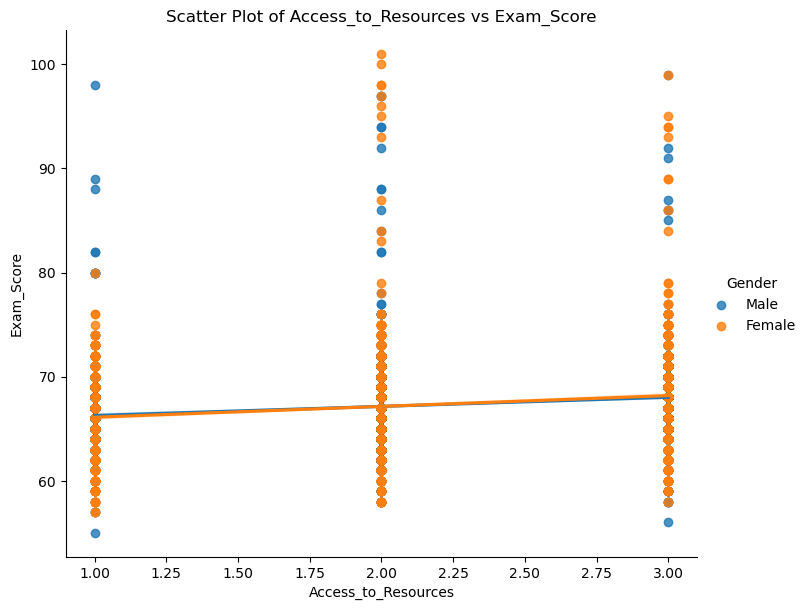

<Figure size 800x600 with 0 Axes>

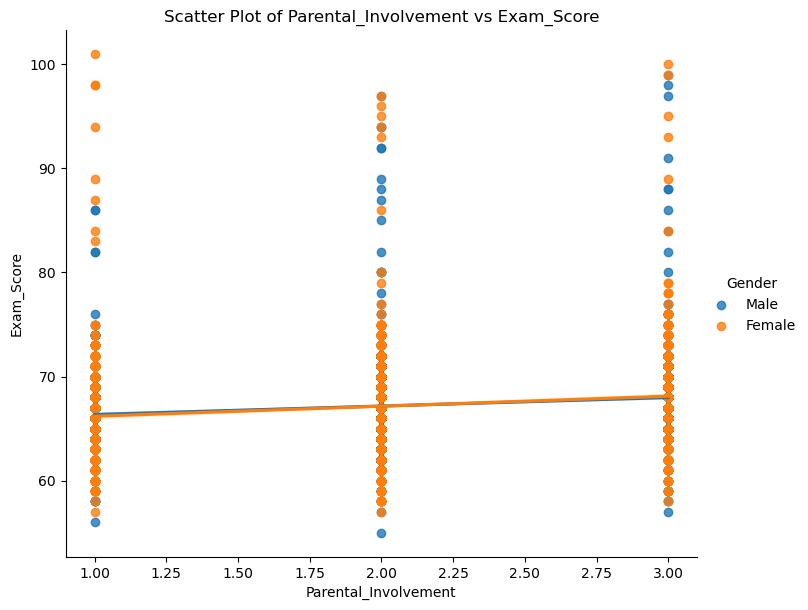

<Figure size 800x600 with 0 Axes>

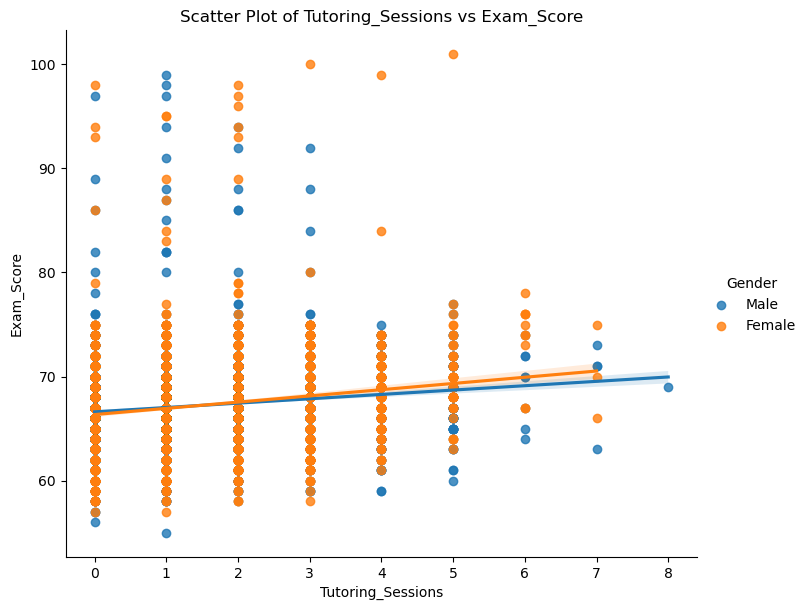

<Figure size 800x600 with 0 Axes>

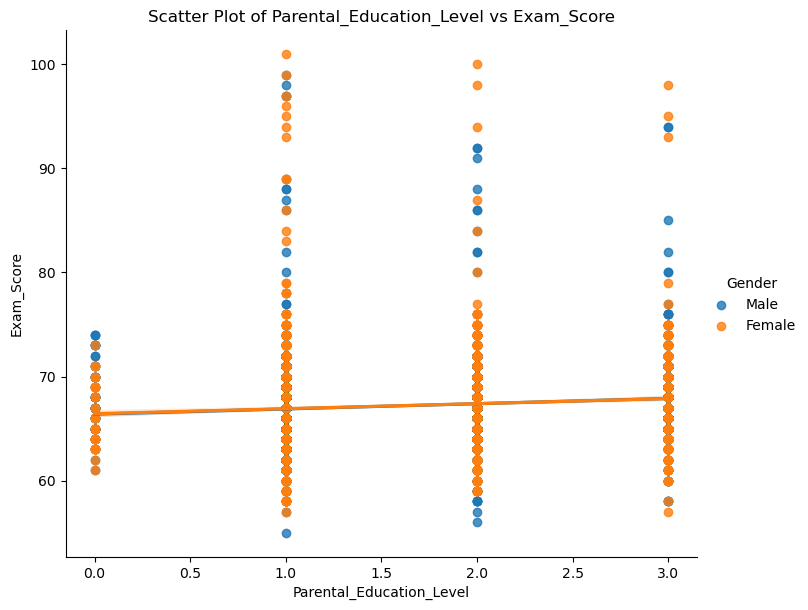

<Figure size 800x600 with 0 Axes>

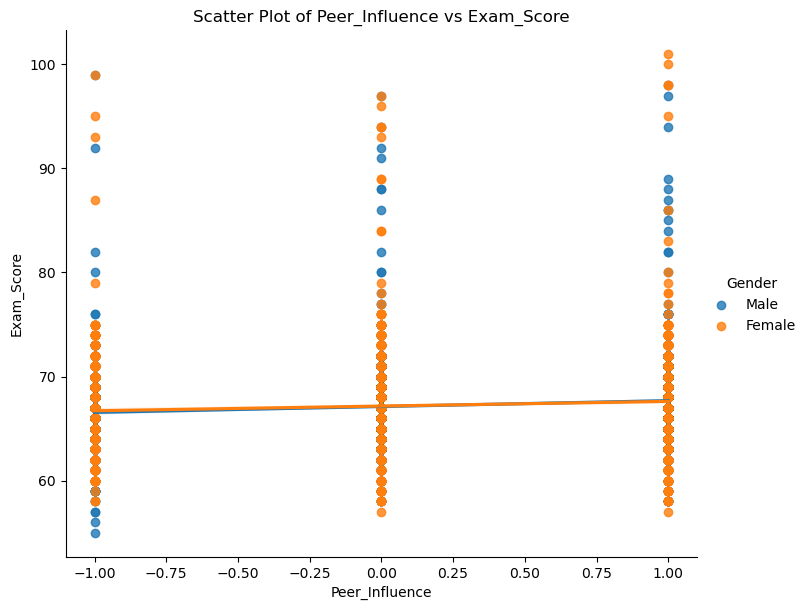

<Figure size 800x600 with 0 Axes>

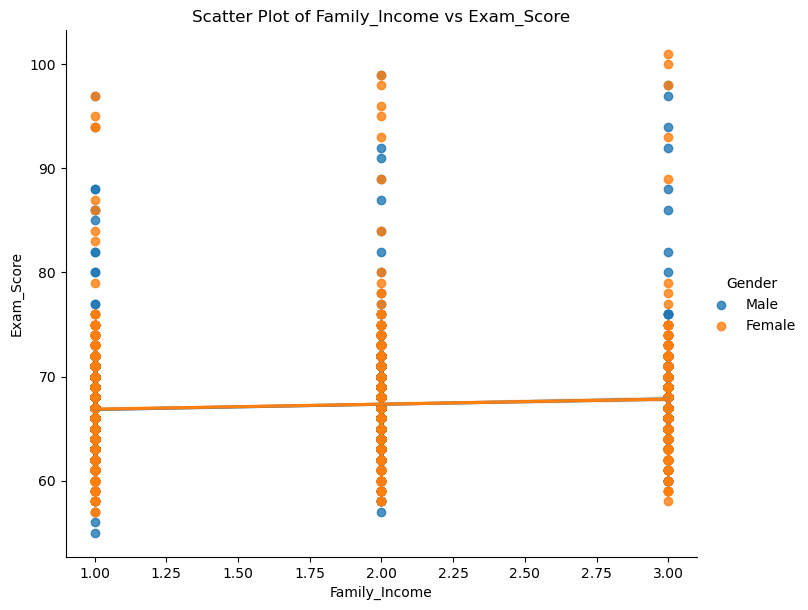

<Figure size 800x600 with 0 Axes>

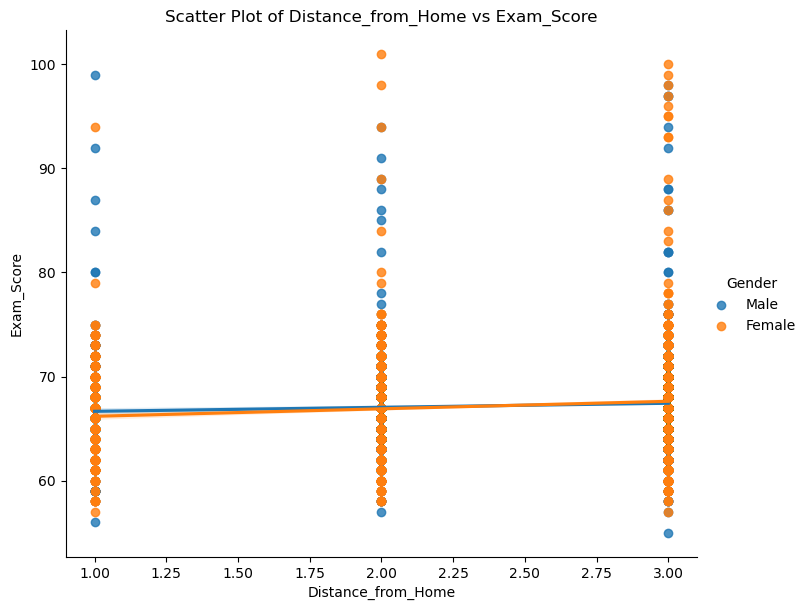

<Figure size 800x600 with 0 Axes>

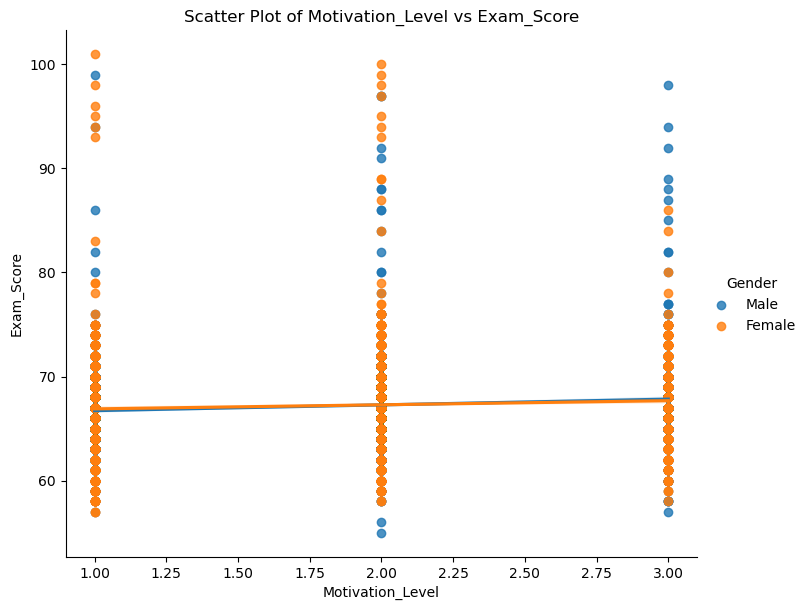

<Figure size 800x600 with 0 Axes>

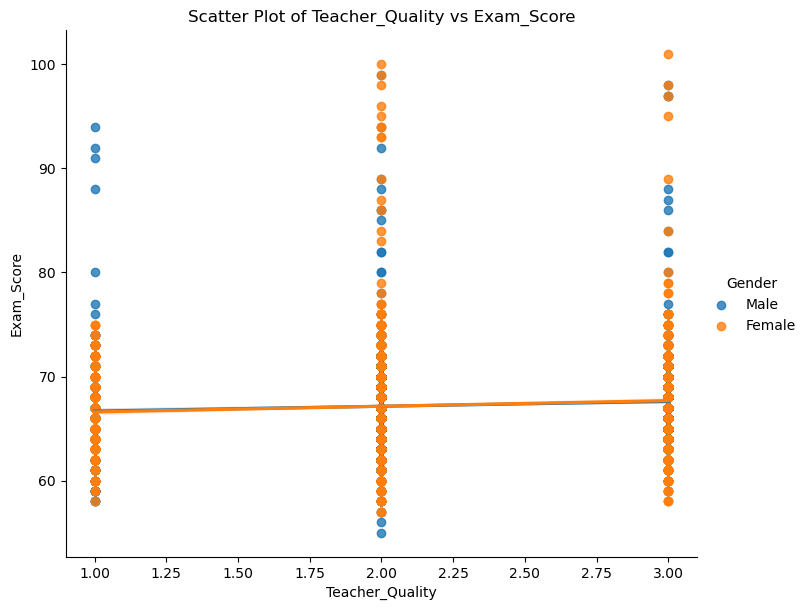

<Figure size 800x600 with 0 Axes>

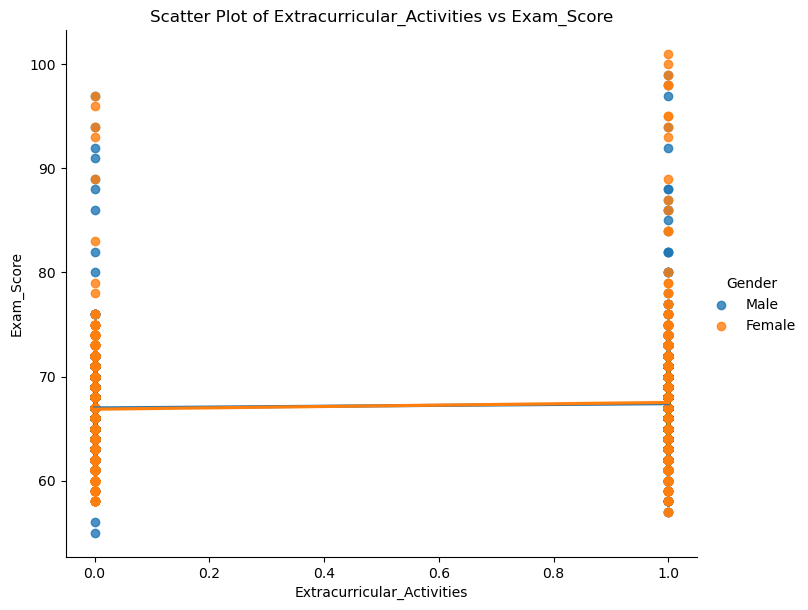

<Figure size 800x600 with 0 Axes>

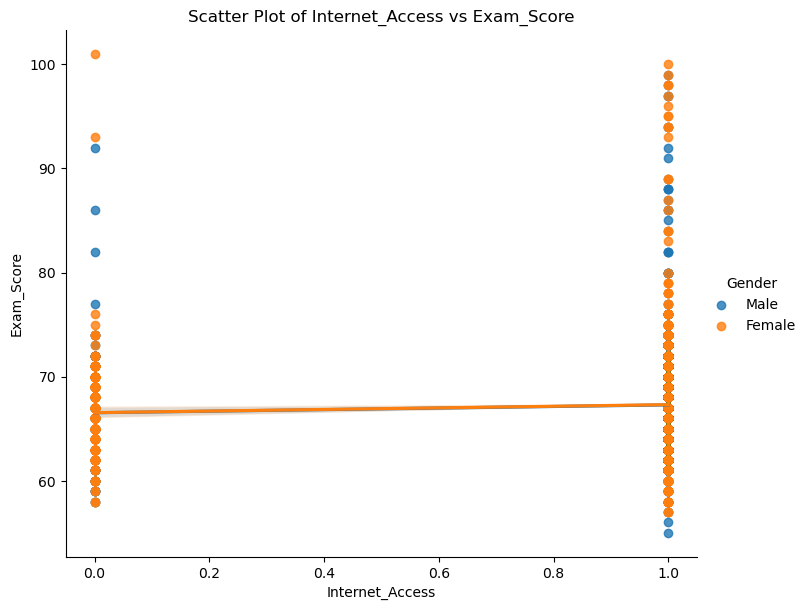

<Figure size 800x600 with 0 Axes>

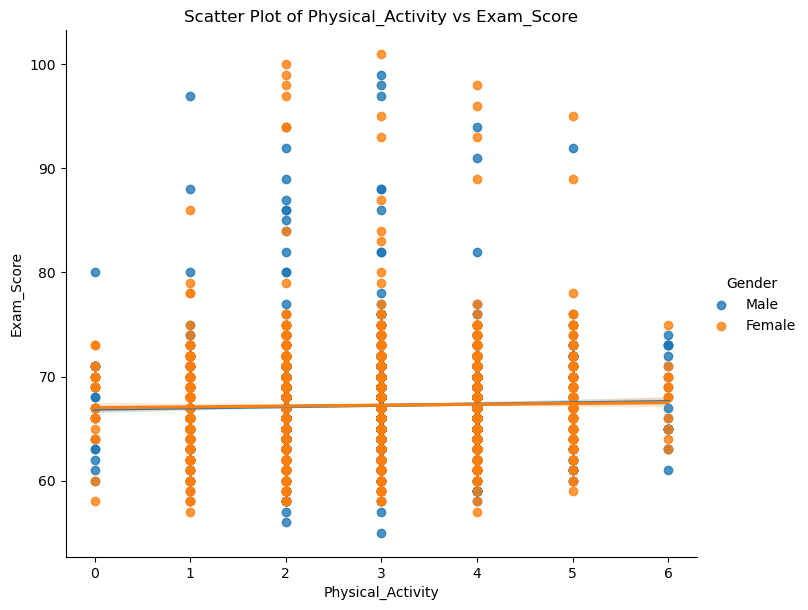

In [32]:

# Column to use for coloring the scatter plots
hue_column = 'Gender'

# Create scatter plots with regression lines for each pair
for (var2, var1) in sorted_pairs.index:
    plt.figure(figsize=(8, 6))
    sns.lmplot(data=data, x=var1, y=var2, hue=hue_column, height=6, aspect=1.2)
    plt.title(f'Scatter Plot of {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

<Figure size 800x600 with 0 Axes>

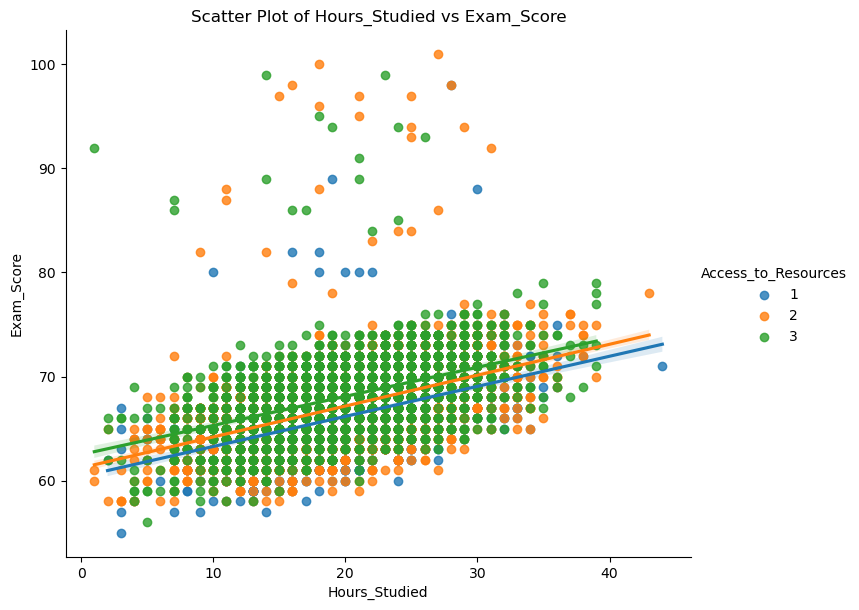

In [37]:
# Column to use for coloring the scatter plots
hue_column = 'Access_to_Resources'

# Create scatter plots with regression lines for each pair
for (var2, var1) in [("Exam_Score", "Hours_Studied")]:
    plt.figure(figsize=(8, 6))
    sns.lmplot(data=data, x=var1, y=var2, hue=hue_column, height=6, aspect=1.2)
    plt.title(f'Scatter Plot of {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

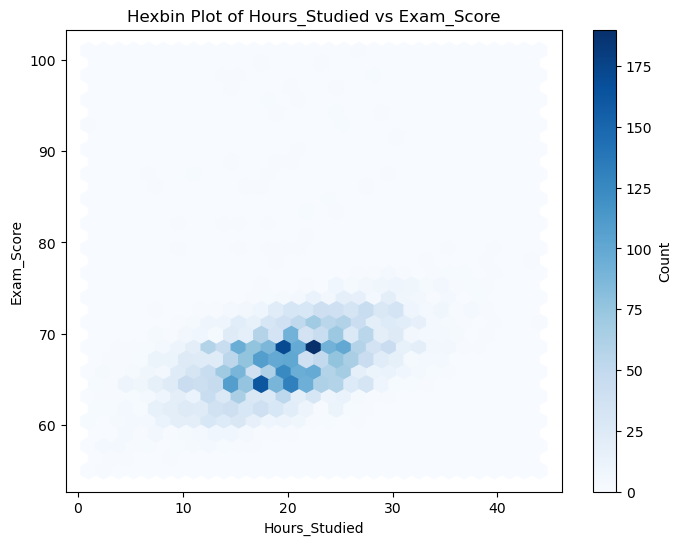

In [36]:

# Column to use for coloring the scatter plots
hue_column = 'Access_to_Resources'

# Create hexbin plots for each pair
for (var2, var1) in [("Exam_Score", "Hours_Studied")]:
    plt.figure(figsize=(8, 6))
    plt.hexbin(data[var1], data[var2], gridsize=30, cmap='Blues')
    plt.colorbar(label='Count')
    plt.title(f'Hexbin Plot of {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()